In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv")

In [3]:
data.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


{'whiskers': [<matplotlib.lines.Line2D at 0x21431396b20>,
 'caps': [<matplotlib.lines.Line2D at 0x214313ad220>,
 'boxes': [<matplotlib.lines.Line2D at 0x214313967c0>],
 'medians': [<matplotlib.lines.Line2D at 0x214313ad910>],
 'fliers': [<matplotlib.lines.Line2D at 0x214313adc70>],
 'means': []}

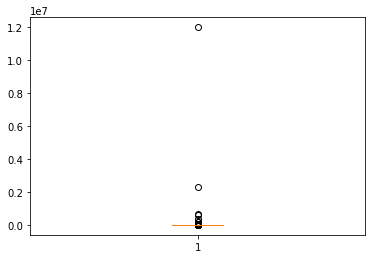

In [5]:
plt.boxplot(data["price_per_sqft"])

In [6]:
data["price_per_sqft"].mean()

7920.336742424242

In [7]:
data["price_per_sqft"].std()

106727.16032810845

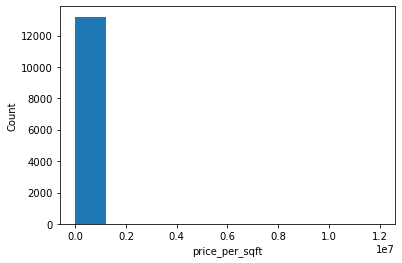

In [48]:
plt.hist(data['price_per_sqft'],bins=10)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

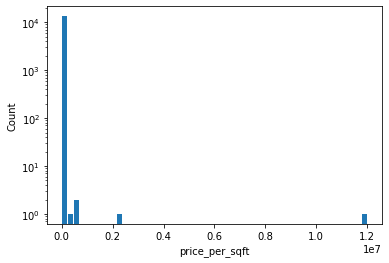

In [47]:
plt.hist(data['price_per_sqft'],bins=50,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


# percentile/quantile

In [10]:
min_threshold,max_threshold = data["price_per_sqft"].quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000099)

In [11]:
outliers = data[(data["price_per_sqft"]>=max_threshold)|(data["price_per_sqft"]<=min_threshold)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [12]:
no_of_outliers = outliers.shape[0]
no_of_outliers

28

In [14]:
data_without_out = data[(data["price_per_sqft"]<max_threshold)&(data["price_per_sqft"]>min_threshold)]
data_without_out.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


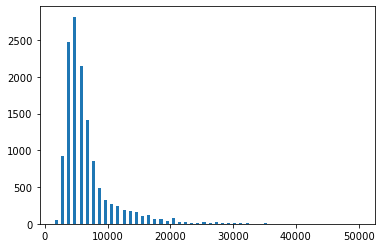

In [17]:
plt.hist(data_without_out["price_per_sqft"],bins=50,rwidth=0.5)
plt.show()

# 4std

In [18]:
upper_lim = data_without_out["price_per_sqft"].mean()+4*data_without_out["price_per_sqft"].std()
lower_lim = data_without_out["price_per_sqft"].mean()-4*data_without_out["price_per_sqft"].std()
upper_lim,lower_lim

(23227.73653589429, -9900.429065502549)

In [19]:
data_std=data_without_out[(data_without_out["price_per_sqft"]<upper_lim)&(data_without_out["price_per_sqft"]>lower_lim)]
data_std.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


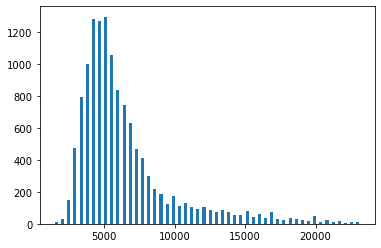

In [49]:
plt.hist(data_std["price_per_sqft"],bins=50,rwidth=0.5)
plt.show()

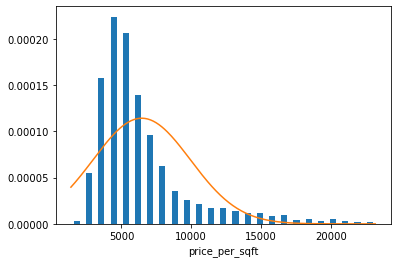

In [52]:
from scipy.stats import norm
plt.hist(data_std["price_per_sqft"],bins=25,rwidth=0.5,density=True)
plt.xlabel("price_per_sqft")

rng = np.arange(data_std["price_per_sqft"].min(),data_std["price_per_sqft"].max(),100)
plt.plot(rng, norm.pdf(rng,data_std["price_per_sqft"].mean(),data_std["price_per_sqft"].std()))

# using z-score

In [33]:
data_without_out['z_score']= (data_without_out["price_per_sqft"]-data_without_out["price_per_sqft"].mean()) / data_without_out["price_per_sqft"].std()

<ipython-input-33-d2de16d80510>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_out['z_score']= (data_without_out["price_per_sqft"]-data_without_out["price_per_sqft"].mean())/data_without_out["price_per_sqft"].std()


In [34]:
data_without_out['z_score'].head()

0   -0.715923
1   -0.494722
2   -0.569583
3   -0.101099
4   -0.582864
Name: z_score, dtype: float64

In [37]:
data_z=data_without_out[(data_without_out['z_score']<4)&(data_without_out['z_score']>-4)]
data_z.describe()

,total_sqft,bath,price,bhk,price_per_sqft,z_score
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045,-0.051757
std,948.777194,1.26673,118.818313,1.211623,3487.670005,0.842225
min,250.000000,1.00000,8.000000,1.000000,1379.000000,-1.276172
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000,-0.580691
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000,-0.301533
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000,0.134833
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000,3.996683


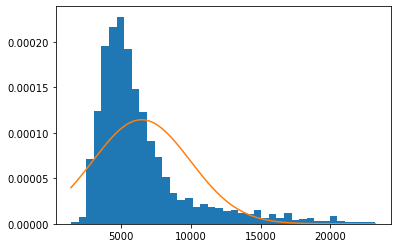

In [43]:
plt.hist(data_z["price_per_sqft"],bins=40,density=True)
rng=np.arange(data_z["price_per_sqft"].min(),data_z["price_per_sqft"].max(),0.1)
plt.plot(rng,norm.pdf(rng,data_z["price_per_sqft"].mean(),data_z["price_per_sqft"].std()))

In [55]:
no_of_outlier_z=data_without_out.shape[0]-data_z["price_per_sqft"].shape[0]
no_of_outlier_z

125

In [54]:
data_z["price_per_sqft"].shape[0]

13047

In [56]:
data_z["price_per_sqft"].dtype

dtype('int64')

In [57]:
data_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13047 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13047 non-null  object 
 1   size            13047 non-null  object 
 2   total_sqft      13047 non-null  float64
 3   bath            13047 non-null  float64
 4   price           13047 non-null  float64
 5   bhk             13047 non-null  int64  
 6   price_per_sqft  13047 non-null  int64  
 7   z_score         13047 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 917.4+ KB


In [59]:
data_z.price_per_sqft

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13047, dtype: int64